# 清理前

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)


/home/leo/anaconda2/envs/ud120/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 练习: 带有异常值的回归斜率

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

print reg.coef_

[[ 5.07793064]]


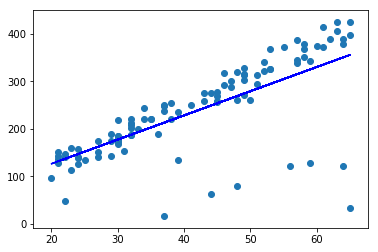

your regression object doesn't exist, or isn't name reg
can't make predictions to use in identifying outliers
outlierCleaner() is returning an empty list, no refitting to be done


In [3]:
#  from 
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"




### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [4]:
# 练习: 带有异常值的回归分数
reg.score(ages_test, net_worths_test)

0.8782624703664671

# 清理后

In [5]:
import math
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = [(a[0], n[0], abs(p[0]-n[0])) for p, a, n in zip(predictions, ages, net_worths)]
    cleaned_data.sort(key=lambda x:-x[2])
    return cleaned_data[len(cleaned_data)/10:]



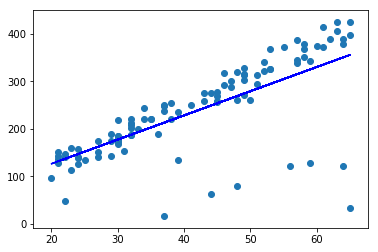

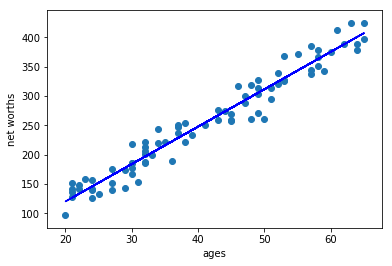

In [6]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [7]:
# 练习: 清理后的斜率
reg.coef_

array([[ 6.36859481]])

In [8]:
# 练习: 清理后的分数
reg.score(ages_test, net_worths_test)

0.98318945539553215

# 安然异常值

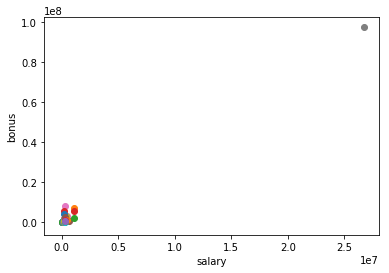

In [9]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

def plot_enron_data(data):
    for point in data:
        salary = point[0]
        bonus = point[1]
        matplotlib.pyplot.scatter( salary, bonus )

    matplotlib.pyplot.xlabel("salary")
    matplotlib.pyplot.ylabel("bonus")
    matplotlib.pyplot.show()

plot_enron_data(data)

In [10]:
# 练习: 识别最大的安然异常值
max_salary = 0
for name, infos in data_dict.items():
    if infos['salary'] != 'NaN' and infos['salary'] > max_salary :
        max_salary = infos['salary']
        target_name = name
print target_name, max_salary

TOTAL 26704229


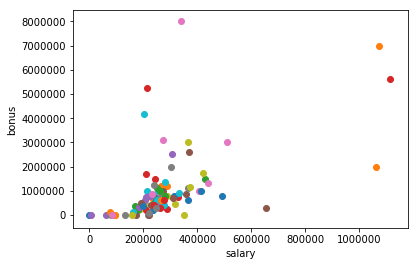

In [11]:
# 练习: 还有更多异常值吗？
data_dict.pop('TOTAL')
data = featureFormat(data_dict, features)
plot_enron_data(data)

In [12]:
# 再识别两个异常值
for name, infos in data_dict.items():
    if infos['salary'] != 'NaN' and infos['salary'] > 1000000 and infos['bonus'] > 5000000:
        print name, infos['salary'] , infos['bonus']

LAY KENNETH L 1072321 7000000
SKILLING JEFFREY K 1111258 5600000
